c:\Users\bertw\miniconda3\envs\volleybill\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Ultralytics YOLOv8.0.34  Python-3.9.16 torch-1.13.1+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\bertw\Documents\Projects\volleybill\ml\data\processed\vball_frame.png: 384x640 6 persons, 78.1ms
Speed: 1.0ms pre-process, 78.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

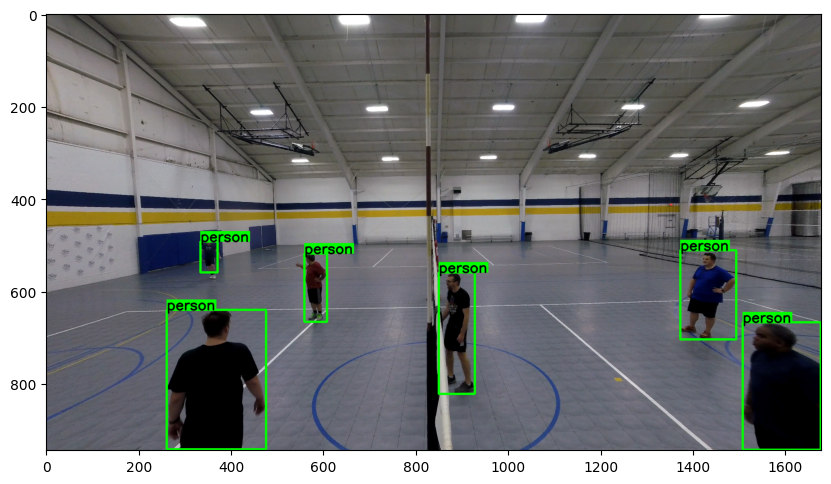

In [2]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("../models/yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
#model.train(data="coco128.yaml", epochs=3)  # train the model
#metrics = model.val()  # evaluate model performance on the validation set
results = model("../data/processed/vball_frame.png")  # predict on an image

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../data/processed/vball_frame.png', 1) #1 reads in color

for box in results[0].boxes: 

    x1 = int(box.xyxy[0][0])
    y1 = int(box.xyxy[0][1])
    x2 = int(box.xyxy[0][2])
    y2 = int(box.xyxy[0][3])
    # print('x1:',x1)
    # print('y1:',y1)
    # print('x2:',x2)
    # print('y2:', y2)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4)
    
    (w, h), _ = cv2.getTextSize(model.names[box.cls.numpy()[0]], cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
    cv2.rectangle(img, (x1, y1-h), (x1+w,y1), (0, 255, 0), -1)
    cv2.putText(img,model.names[box.cls.numpy()[0]],[x1,y1],cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2, cv2.LINE_AA)
    # RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # plt.imshow(RGB_img)
    # plt.show()

RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(RGB_img,aspect='equal')
plt.show



In [5]:
vidcap = cv2.VideoCapture('../data/processed/GP050269_undistorted_10s.mp4')
success,image = vidcap.read()

images = []

while success:
  results = model(image)  # predict on an image

  for box in results[0].boxes: 

      x1 = int(box.xyxy[0][0])
      y1 = int(box.xyxy[0][1])
      x2 = int(box.xyxy[0][2])
      y2 = int(box.xyxy[0][3])

      cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 4)
      
      (w, h), _ = cv2.getTextSize(model.names[box.cls.numpy()[0]], cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
      cv2.rectangle(image, (x1, y1-h), (x1+w,y1), (0, 255, 0), -1)
      cv2.putText(image,model.names[box.cls.numpy()[0]],[x1,y1],cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2, cv2.LINE_AA)

      
     
  
  images.append(image)
  success,image = vidcap.read()

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
img_dimensions = images[0].shape
video = cv2.VideoWriter("../data/processed/output2.mp4", fourcc, 30, (img_dimensions[1],img_dimensions[0]))

for image in images:
    frameRGB = cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
    video.write(frameRGB)
video.release()
 


0: 384x640 7 persons, 81.0ms
Speed: 1.0ms pre-process, 81.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 6 persons, 79.0ms
Speed: 1.0ms pre-process, 79.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 persons, 82.5ms
Speed: 1.0ms pre-process, 82.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 persons, 83.0ms
Speed: 1.0ms pre-process, 83.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 6 persons, 89.0ms
Speed: 0.0ms pre-process, 89.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 6 persons, 87.0ms
Speed: 0.0ms pre-process, 87.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 persons, 78.2ms
Speed: 1.0ms pre-process, 78.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 6 persons, 80.0ms
Speed: 1.0ms pre-process, 80.0ms inference, 0.0ms postprocess per image at